In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
us_covid = pd.read_csv('../johnshopkins/covid-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
us_mobility = pd.read_csv('data/2020_US_Region_Mobility_Report.csv')

In [23]:
maricopa_covid = us_covid.loc[(us_covid['Admin2'] == 'Maricopa')]
maricopa_mobility = us_mobility.loc[us_mobility['sub_region_2'] == 'Maricopa County']
maricopa_covid = maricopa_covid.T.reset_index()

,index,108
0,UID,84004013
1,iso2,US
2,iso3,USA
3,code3,840
4,FIPS,4013


([<matplotlib.axis.XTick at 0x127af5190>,
 <a list of 8 Text xticklabel objects>)

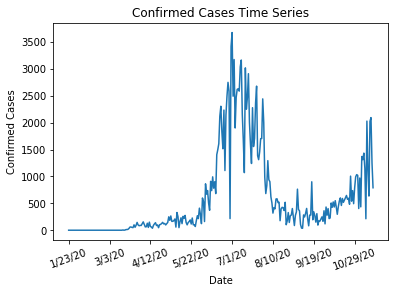

In [33]:
plot_date = maricopa_covid.loc[11:]
date = maricopa_covid['index'].loc[12:].tolist()
cases = plot_date[108].tolist()

daily = []
for i in range(len(cases)-1):
    change = 0
    change = cases[i+1] - cases[i]
    daily.append(change)
    i += 1
    
months = mdates.MonthLocator()
    
plt.plot(date, daily)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases Time Series")

plt.xticks(np.arange(0, 299, step=40),rotation=20)

In [5]:
df = pd.DataFrame({'Date' : date,
                  'New Cases' : daily})
df.to_csv('data/maricopa_new_cases.csv')

([<matplotlib.axis.XTick at 0x128285350>,
 <a list of 8 Text xticklabel objects>)

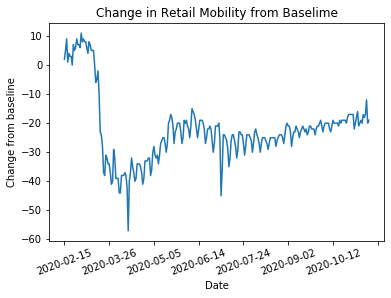

In [34]:
date = maricopa_mobility['date']
retail = maricopa_mobility['retail_and_recreation_percent_change_from_baseline']
home = maricopa_mobility['residential_percent_change_from_baseline']

plt.plot(date, retail)
plt.xlabel("Date")
plt.ylabel("Change from baseline")
plt.title("Change in Retail Mobility from Baselime")
plt.xticks(np.arange(0, 299, step=40),rotation=20)

([<matplotlib.axis.XTick at 0x127c2dad0>,
 <a list of 8 Text xticklabel objects>)

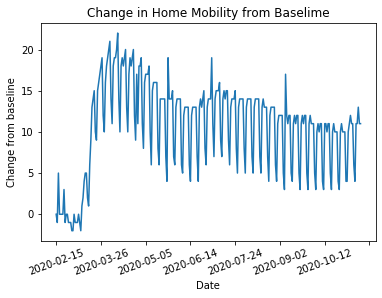

In [36]:
plt.plot(date, home)
plt.xlabel("Date")
plt.ylabel("Change from baseline")
plt.title("Change in Home Mobility from Baselime")
plt.xticks(np.arange(0, 299, step=40),rotation=20)